<a href="https://colab.research.google.com/github/nomso-o/ML-notebooks/blob/main/skelarnLinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

### Import relevant Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.linear_model import LinearRegression



In [63]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [65]:
! kaggle datasets download mayurdalvi/simple-linear-regression-placement-data

simple-linear-regression-placement-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
! unzip simple-linear-regression-placement-data.zip


Archive:  simple-linear-regression-placement-data.zip
replace placement.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: placement.csv           


### Load the Data

In [67]:
data = pd.read_csv("placement.csv")

In [68]:
display(data)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [69]:
data.drop_duplicates(inplace = True)
data.dropna(inplace = True)
display(data)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


## Create regression: Predict the cgpa using the placement exam marks

### Declare the dependent and independent variables


In [70]:
x = data ["placement_exam_marks"]
y = data["cgpa"]


In [71]:
#check the shape of the variables

x.shape

(981,)

In [72]:
y.shape

(981,)

### Regression

In [73]:
reg = LinearRegression()

x_ = x.values.reshape(-1,1)

In [74]:
x_.shape

(981, 1)

In [75]:
reg.fit(x_,y)

LinearRegression()

## R-Squared

In [76]:
reg.score(x_,y)

0.0010133036620318947

## Coefficients

In [77]:
reg.coef_

array([-0.00102471])

## Intercept

In [78]:
reg.intercept_

6.994216815382215

## Making predictions

In [79]:
reg.predict([[65]])

array([6.9276106])

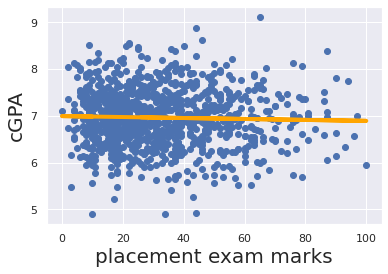

In [82]:
plt.scatter (x_,y)

yhat = reg.coef_*x_+ reg.intercept_

fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('placement exam marks', fontsize =20)
plt.ylabel('cGPA', fontsize=20)
plt.show()